# Exploring, Analyzing and Modeling Amazon's Bestseller Novels

This project will explore and analyze data from 'novels' search term on amazon.com at any point in time, and will culminate in building and deploying a machine learning model to predict whether or not a novel will become an amazon bestseller based on certain attributes.

This is an end to end machine learning project from scratch. It involves: <br>
- data collection through web scraping (building the web scraper from scratch) <br>
- data cleaning and transformation <br>
- data exploration <br>
- data analysis <br>
- training a predictive ML model on the data to predict whether a novel is a bestseller <br>
- deploying the model within a flask web application on my local host <br>
- deploying the flask web application to the cloud using AWS' EC2



## Setting up the environment

In [1]:
#!pip install requests
#!pip install html5lib
#!pip install bs4
# run this on anaconda prompt:   conda install -c conda-forge xgboost
#!pip install xgboost

In [2]:
import csv
from bs4 import BeautifulSoup
from selenium import webdriver
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Creating an instance of the webdriver to start it up
driver = webdriver.Chrome("C:/Users/amari/Downloads/chromedriver_win32/chromedriver.exe")

In [4]:
# Get the url for novels search term
url = "https://www.amazon.com/s?k=novels&crid=3O8O36XTXBKAX&sprefix=novels%2Caps%2C336&ref=nb_sb_noss_1"
driver.get(url)

### Extracting the content of the first page from the html in the background

In [5]:
#creating soup object which will parse the html content from the page source

soup = BeautifulSoup(driver.page_source, 'html.parser')

results = soup.find_all('div', {'data-component-type': 's-search-result'})
len(results)

60

### Extracting a single record

In [6]:
item = results[0]
atag = item.h2.a
description = atag.text.strip()
description

'Observer: A novel'

In [7]:
atag.get('href')

'/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A0904949242MG5ZBMM456&url=%2FObserver-novel-Robert-Lanza%2Fdp%2F1611883431%2Fref%3Dsr_1_1_sspa%3Fcrid%3D3O8O36XTXBKAX%26keywords%3Dnovels%26qid%3D1664965469%26qu%3DeyJxc2MiOiI4LjQ1IiwicXNhIjoiNy43NCIsInFzcCI6IjcuNjMifQ%253D%253D%26sprefix%3Dnovels%252Caps%252C336%26sr%3D8-1-spons%26psc%3D1&qualifier=1664965469&id=2547596417674147&widgetName=sp_atf'

In [8]:
url = 'https://www.amazon.com' + atag.get('href')
url

'https://www.amazon.com/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A0904949242MG5ZBMM456&url=%2FObserver-novel-Robert-Lanza%2Fdp%2F1611883431%2Fref%3Dsr_1_1_sspa%3Fcrid%3D3O8O36XTXBKAX%26keywords%3Dnovels%26qid%3D1664965469%26qu%3DeyJxc2MiOiI4LjQ1IiwicXNhIjoiNy43NCIsInFzcCI6IjcuNjMifQ%253D%253D%26sprefix%3Dnovels%252Caps%252C336%26sr%3D8-1-spons%26psc%3D1&qualifier=1664965469&id=2547596417674147&widgetName=sp_atf'

In [9]:
# getting the price
price = item.find('span', {'class':'a-price', 'class':'a-offscreen'}).text.replace("$", "")
price

'21.99'

In [10]:
# getting the ratings. Inspecting the stars shows that ratings are in the i tag
try:
    rating = item.i.text
except AttributeError:
    rating = ''

In [11]:
#getting the number of reviews
try:
    reviews = item.find('span', {'class':'a-size-base s-underline-text'}).text.replace(",", "").strip()
except AttributeError:
    reviews = ''    

In [12]:
#author
author = item.find('div', {'class':'a-row a-size-base a-color-secondary'}).text.replace("by", "").strip()

In [13]:
results[5].find('div', {'class':'a-row a-size-base a-color-secondary'}).text.replace("by", "").strip()

'Sarah Penner'

In [14]:
results[0].find('div', {'class':'a-row a-size-base a-color-secondary'}).text.replace("by", "").strip()

'Robert Lanza  and Nancy Kress'

In [15]:
# getting the book cover type (binding)
try:
    binding = item.find('a', 'a-size-base a-link-normal s-underline-text s-underline-link-text s-link-style a-text-bold').text
except AttributeError:
    binding = ''

In [16]:
# Is the book a best seller or not?
try:
    #bestseller
    bestseller = item.find('span', {'class':'a-badge-text'}).text
except AttributeError:
    bestseller = 'No'

In [17]:
results[0].find('div', {'id':'detailBullets_feature_div', 'class':'a-text-bold' })

### A function to extract all the records on the first page

Here, I added error handling (for AttributeError) since some attributes may be missing in some of the records

In [18]:
def extract_record(item):
    """Extract and return data from a single record"""
   
    # description and url
    item = results[0]
    atag = item.h2.a
    description = atag.text.strip()
    url = 'https://www.amazon.com' + atag.get('href')
    
    try:
        #price
        price = item.find('span', {'class':'a-price', 'class':'a-offscreen'}).text.replace("$", "")
    except AttributeError:
        return
    
    try:
        #rating
        rating = item.i.text
    except AttributeError:
        return
    
    try:
        #review_count
        review_count = item.find('span', {'class':'a-size-base s-underline-text'}).text.replace(",", "").strip()
    except AttributeError:
        return
    
    try:
        #author
        author = item.find('div', {'class':'a-row a-size-base a-color-secondary'}).text.replace("by", "").strip()
    except AttributeError:
        return
    
    try:
        #binding
        binding = item.find('a', 'a-size-base a-link-normal s-underline-text s-underline-link-text s-link-style a-text-bold').text
    except AttributeError:
        return
    
    try:
        #bestseller
        bestseller = item.find('span', {'class':'a-badge-text'}).text
    except AttributeError:
        bestseller = 'No'
    
    result = (description, url, price, rating, review_count, author, binding, bestseller)
    
    return result

In [19]:
# apply the pattern to all records on the page 

records =[]
results = soup.find_all('div', {'data-component-type': 's-search-result'})

for item in results:
    record = extract_record(item)
    if record:   #ie, if record has something in it
        records.append(record)

In [20]:
#records[1]

### Getting subsequent pages

In [21]:
def get_url(search_term):
    """Generate a url from search term"""
    template = 'https://www.amazon.com/s?k={}&crid=3O8O36XTXBKAX&sprefix={}%2Caps%2C336&ref=nb_sb_noss_1'
    search_term = search_term.replace(' ', '+')
    
    # add term query to url
    url = template.format(search_term, search_term)
    
    #add page query placeholder
    url += '&page{}'  #this gives a place to insert the next page number (with string formatting)
    
    return url

In [22]:
get_url('novels')

'https://www.amazon.com/s?k=novels&crid=3O8O36XTXBKAX&sprefix=novels%2Caps%2C336&ref=nb_sb_noss_1&page{}'

### Putting it all together in a function that stores the data to a .CSV file

In [23]:
import csv
from bs4 import BeautifulSoup
from selenium import webdriver


def get_url(search_term):
    """Generate a url from search term for all pages"""
    
    template = 'https://www.amazon.com/s?k={}&page=1&crid=3O8O36XTXBKAX&sprefix={}%2Caps%2C336&ref=nb_sb_noss_1'
    search_term = search_term.replace(' ', '+')
    
    # add term query to url
    url = template.format(search_term, search_term)
    
    #add page query placeholder
    url += '&page={}'  #this gives a place to insert the next page number (with string formatting)
    
    return url


def extract_record(item):
    """Extract and return data from a single record"""
   
    # description and url
    atag = item.h2.a
    description = atag.text.strip()
    url = 'https://www.amazon.com' + atag.get('href')
    
    try:
        #price
        price = item.find('span', {'class':'a-price', 'class':'a-offscreen'}).text.replace("$", "")
    except AttributeError:
        return
    
    try:
        #rating
        rating = item.i.text
    except AttributeError:
        return
    
    try:
        #review_count
        review_count = item.find('span', {'class':'a-size-base s-underline-text'}).text.replace(",", "").strip()
    except AttributeError:
        return
    
    try:
        #author
        author = item.find('div', {'class':'a-row a-size-base a-color-secondary'}).text.replace("by", "").strip()
    except AttributeError:
        return
    
    try:
        #binding
        binding = item.find('a', 'a-size-base a-link-normal s-underline-text s-underline-link-text s-link-style a-text-bold').text
    except AttributeError:
        return
    
    try:
        #bestseller
        bestseller = item.find('span', {'class':'a-badge-text'}).text
    except AttributeError:
        bestseller = 'No'
    
    result = (description, url, price, rating, review_count, author, binding, bestseller)
    
    return result


def main(search_term):
    """Run main program routine"""
    #startup the web driver
    driver = webdriver.Chrome("C:/Users/amari/Downloads/chromedriver_win32/chromedriver.exe")
    
    records = []
    url = get_url(search_term)
    
    for page in range (1, 21):
        driver.get(url.format(page))
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        results = soup.find_all('div', {'data-component-type': 's-search-result'})
        
        for item in results:
            record = extract_record(item)
            if record:
                records.append(record)
                
    driver.close()
    
    #save data to csv
    with open('results_novels.csv', 'w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(['description', 'url', 'price', 'rating', 'review_count', 'author', 'binding', 'bestseller'])
        writer.writerows(records)
    

### Calling the function to scrape the novels data from amazon.com and store it in a .CSV file

In [24]:
#main('novels')

# Importing the data

In [25]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Importing the scraped results from above
novels_raw = pd.read_csv('results_novels.csv')

In [27]:
novels_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   description   518 non-null    object 
 1   url           518 non-null    object 
 2   price         518 non-null    float64
 3   rating        518 non-null    object 
 4   review_count  518 non-null    int64  
 5   author        518 non-null    object 
 6   binding       518 non-null    object 
 7   bestseller    518 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 32.5+ KB


# Data cleaning

In [28]:
# making the ratings and review_count column numeric
novels_raw['rating'] = novels_raw['rating'].str.replace('out of 5 stars', '').astype(float)
novels_raw['review_count'] = novels_raw['review_count'].astype(str).astype(int)
novels_raw.tail(60)       

,description,url,price,rating,review_count,author,binding,bestseller
458,Born With The Right To Happiness: The novel ab...,https://www.amazon.com/gp/slredirect/picassoRe...,15.75,5.0,2,Pride U Confident,Paperback,No
459,The Fortunes of Felix Fontana: Book 1 of the F...,https://www.amazon.com/gp/slredirect/picassoRe...,12.99,4.1,6,Derek Anderson and Tommy Anderson,Paperback,No
460,A Book of Days (Books of Furnass),https://www.amazon.com/gp/slredirect/picassoRe...,9.95,3.8,5,Richard Snodgrass,Paperback,No
461,Blood of Cain (The First Bloodline),https://www.amazon.com/gp/slredirect/picassoRe...,9.99,4.7,9,Michael NeVille and Roman NeVille,Paperback,No
462,Cowboy's Accidental Wife (Cowboy Billionaires),https://www.amazon.com/gp/slredirect/picassoRe...,10.99,4.5,385,J. P. Comeau,Paperback,No
463,TURTLE CREEK: Enigma of the trail,https://www.amazon.com/gp/slredirect/picassoRe...,10.99,3.7,19,Mr. RUBEN ELUSTONDO,Paperback,No
464,SPOON LICKER,https://www.amazon.com/gp/slredirect/picassoRe...,10.78,4.9,15,Cassidy Barker,Paperback,No
465,Novel Problems: Some books should stay buried!,https://www.amazon.com/gp/slredirect/picassoRe...,12.95,4.1,21,George T Morrison,Paperback,No
466,The Peacemaker's Code,https://www.amazon.com/gp/slredirect/picassoRe...,11.96,4.7,2427,Deepak Malhotra,Paperback,No
467,Lowcountry Rising,https://www.amazon.com/gp/slredirect/picassoRe...,4.02,4.3,8,Samuel Othello Barlow,Paperback,No


In [29]:
# adding a new cleaner author column, 'author2' while removing unwanted data like 'Book 6 of 6:' from the author column
novels_raw['author2'] = novels_raw['author'].str.split(':', n=1).str.get(-1).str.strip()
novels_raw.head(5)

,description,url,price,rating,review_count,author,binding,bestseller,author2
0,Long Shadows: A Novel,https://www.amazon.com/gp/slredirect/picassoRe...,15.26,4.5,49,Abigail Cutter,Paperback,No,Abigail Cutter
1,Her Majesty's Auditor: An Adventure Novel with...,https://www.amazon.com/gp/slredirect/picassoRe...,13.99,5.0,1,Markus Pfeiler,Paperback,No,Markus Pfeiler
2,Things We Never Got Over,https://www.amazon.com/gp/slredirect/picassoRe...,14.24,4.5,75881,Lucy Score,Paperback,No,Lucy Score
3,In Five Years: A Novel,https://www.amazon.com/Five-Years-Novel-Rebecc...,10.03,4.3,36409,Rebecca Serle,Paperback,Editors' pick,Rebecca Serle
4,Fairy Tale,https://www.amazon.com/Audible-Fairy-Tale/dp/B...,0.00,4.7,7870,"Stephen King, Seth Numrich, et al.",Audible Audiobook,Best Seller,"Stephen King, Seth Numrich, et al."


In [30]:
#checking for duplicates
novels_raw.describe(include='object')

,description,url,author,binding,bestseller,author2
count,518,518,518,518,518,518
unique,505,518,463,5,4,434
top,A Coat Dyed Black: A Novel of the Norwegian Re...,https://www.amazon.com/gp/slredirect/picassoRe...,Colleen Hoover,Paperback,No,Colleen Hoover
freq,2,1,8,284,378,8


Although there are 510 titles, there are only 500 unique titles, which means some of them are duplicates, which have to be dropped.

In [31]:
novels_raw = novels_raw.drop_duplicates(subset=['description'])

In [32]:
novels_raw.describe(include='object')

,description,url,author,binding,bestseller,author2
count,505,505,505,505,505,505
unique,505,505,462,5,4,433
top,Long Shadows: A Novel,https://www.amazon.com/gp/slredirect/picassoRe...,Colleen Hoover,Paperback,No,Colleen Hoover
freq,1,1,8,281,367,8


In [33]:
# checking for data types and null values
novels_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 505 entries, 0 to 517
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   description   505 non-null    object 
 1   url           505 non-null    object 
 2   price         505 non-null    float64
 3   rating        505 non-null    float64
 4   review_count  505 non-null    int32  
 5   author        505 non-null    object 
 6   binding       505 non-null    object 
 7   bestseller    505 non-null    object 
 8   author2       505 non-null    object 
dtypes: float64(2), int32(1), object(6)
memory usage: 37.5+ KB


This reveals there are no null values and the data types look fine

In [34]:
# Renaming and reorganizing the columns
novels_raw.rename(columns = {'description':'title', 'review_count':'customers_rated', 'bestseller': 'bestseller/editorspick'}, inplace=True)
novels_clean = novels_raw[['title', 'author2', 'binding', 'rating', 'customers_rated',  'price', 'bestseller/editorspick', 'url']]
novels_clean

,title,author2,binding,rating,customers_rated,price,bestseller/editorspick,url
0,Long Shadows: A Novel,Abigail Cutter,Paperback,4.5,49,15.26,No,https://www.amazon.com/gp/slredirect/picassoRe...
1,Her Majesty's Auditor: An Adventure Novel with...,Markus Pfeiler,Paperback,5.0,1,13.99,No,https://www.amazon.com/gp/slredirect/picassoRe...
2,Things We Never Got Over,Lucy Score,Paperback,4.5,75881,14.24,No,https://www.amazon.com/gp/slredirect/picassoRe...
3,In Five Years: A Novel,Rebecca Serle,Paperback,4.3,36409,10.03,Editors' pick,https://www.amazon.com/Five-Years-Novel-Rebecc...
4,Fairy Tale,"Stephen King, Seth Numrich, et al.",Audible Audiobook,4.7,7870,0.00,Best Seller,https://www.amazon.com/Audible-Fairy-Tale/dp/B...
...,...,...,...,...,...,...,...,...
513,Seismic Sedition: The Heinous Crimes of Profes...,D.T.E. Madden,Paperback,4.2,5,13.99,No,https://www.amazon.com/gp/slredirect/picassoRe...
514,Eternally Beloved: I Shall Never Let You Go (K...,Ann Marie Ru,Paperback,4.6,3,10.99,No,https://www.amazon.com/gp/slredirect/picassoRe...
515,Good Intentions (Amish Lantern Mystery Series),Mary B. Barbee,Paperback,4.6,87,9.99,No,https://www.amazon.com/gp/slredirect/picassoRe...
516,Stolen Truth,Henya Drescher,Paperback,4.1,31,16.95,No,https://www.amazon.com/gp/slredirect/picassoRe...


## Data exploration

In [35]:
novels_clean.describe()

,rating,customers_rated,price
count,505.000000,505.000000,505.000000
mean,4.472079,11772.237624,10.998376
std,0.316028,27660.760208,7.687440
min,2.300000,1.000000,0.000000
25%,4.300000,70.000000,6.550000
50%,4.500000,1519.000000,11.690000
75%,4.700000,11082.000000,14.990000
max,5.000000,344309.000000,70.360000


In [36]:
novels_clean.describe(include='object')

,title,author2,binding,bestseller/editorspick,url
count,505,505,505,505,505
unique,505,433,5,4,505
top,Long Shadows: A Novel,Colleen Hoover,Paperback,No,https://www.amazon.com/gp/slredirect/picassoRe...
freq,1,8,281,367,1


In [37]:
novels_clean['bestseller/editorspick'].value_counts(normalize=True)

No                0.726733
Editors' pick     0.166337
Best Seller       0.097030
Teachers' pick    0.009901
Name: bestseller/editorspick, dtype: float64

We see that 68% of my novels search result did not make it to any of the status like bestseller, editors' pick. Goodreads choice or teachers' pick. This is represented graphically below

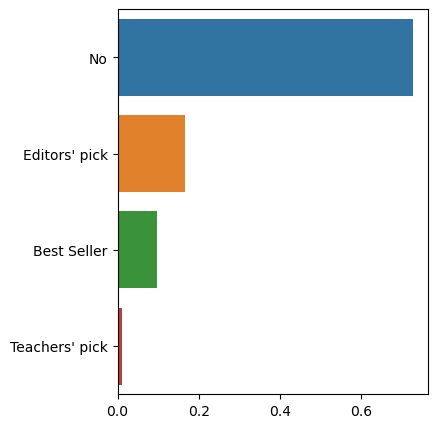

In [38]:
# make horizontal bar chart

fig, ax = plt.subplots(figsize=(4, 5))
subset = novels_clean['bestseller/editorspick'].value_counts(normalize=True)
sns.barplot(y=subset.index, x=subset.values)
plt.show()

I want to classify a novel as successful if it made it into one of the following status: Editors' pick, Best Seller,  Goodreads Choice and Teachers' pick. For this reason, we can combine the values, Editors' pick, Best Seller,  Goodreads Choice and Teachers' pick into one new value, bestseller, else, non-bestseller 

In [39]:
# Replacing the 'bestseller/editorspick' column with TRUE or FALSE
novels_clean['bestseller/editorspick'] = novels_clean['bestseller/editorspick'].replace(["Editors' pick", 'Best Seller', 'Goodreads Choice', "Teachers' pick"], 'bestseller')
novels_clean['bestseller/editorspick'] = novels_clean['bestseller/editorspick'].replace(['No'], 'non-bestseller')
novels_clean                                                                                         

,title,author2,binding,rating,customers_rated,price,bestseller/editorspick,url
0,Long Shadows: A Novel,Abigail Cutter,Paperback,4.5,49,15.26,non-bestseller,https://www.amazon.com/gp/slredirect/picassoRe...
1,Her Majesty's Auditor: An Adventure Novel with...,Markus Pfeiler,Paperback,5.0,1,13.99,non-bestseller,https://www.amazon.com/gp/slredirect/picassoRe...
2,Things We Never Got Over,Lucy Score,Paperback,4.5,75881,14.24,non-bestseller,https://www.amazon.com/gp/slredirect/picassoRe...
3,In Five Years: A Novel,Rebecca Serle,Paperback,4.3,36409,10.03,bestseller,https://www.amazon.com/Five-Years-Novel-Rebecc...
4,Fairy Tale,"Stephen King, Seth Numrich, et al.",Audible Audiobook,4.7,7870,0.00,bestseller,https://www.amazon.com/Audible-Fairy-Tale/dp/B...
...,...,...,...,...,...,...,...,...
513,Seismic Sedition: The Heinous Crimes of Profes...,D.T.E. Madden,Paperback,4.2,5,13.99,non-bestseller,https://www.amazon.com/gp/slredirect/picassoRe...
514,Eternally Beloved: I Shall Never Let You Go (K...,Ann Marie Ru,Paperback,4.6,3,10.99,non-bestseller,https://www.amazon.com/gp/slredirect/picassoRe...
515,Good Intentions (Amish Lantern Mystery Series),Mary B. Barbee,Paperback,4.6,87,9.99,non-bestseller,https://www.amazon.com/gp/slredirect/picassoRe...
516,Stolen Truth,Henya Drescher,Paperback,4.1,31,16.95,non-bestseller,https://www.amazon.com/gp/slredirect/picassoRe...


In [40]:
novels_clean['bestseller/editorspick'].value_counts(normalize=True)

non-bestseller    0.726733
bestseller        0.273267
Name: bestseller/editorspick, dtype: float64

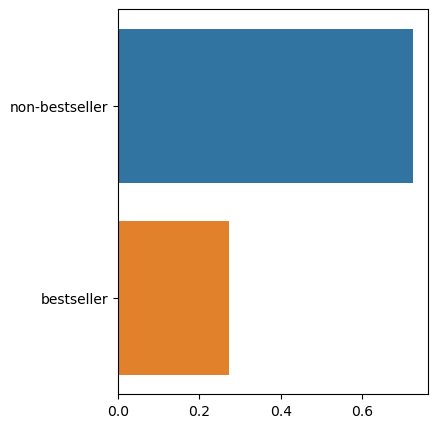

In [41]:
# Visualizing the proportion of bestseller(TRUE) to non-bestseller(FALSE) in the entire novels search

fig, ax = plt.subplots(figsize=(4, 5))
subset = novels_clean['bestseller/editorspick'].value_counts(normalize=True)
sns.barplot(y=subset.index, x=subset.values)
plt.show()

In [42]:
# Getting the number of novels per binding format

binding_count = pd.DataFrame(novels_clean['binding'].value_counts()).rename(columns = {'binding':'Count'}).reset_index().rename(columns = {'index':'Binding'})
binding_count

,Binding,Count
0,Paperback,281
1,Kindle,120
2,Audible Audiobook,65
3,Hardcover,36
4,Mass Market Paperback,3


Text(0, 0.5, 'count')

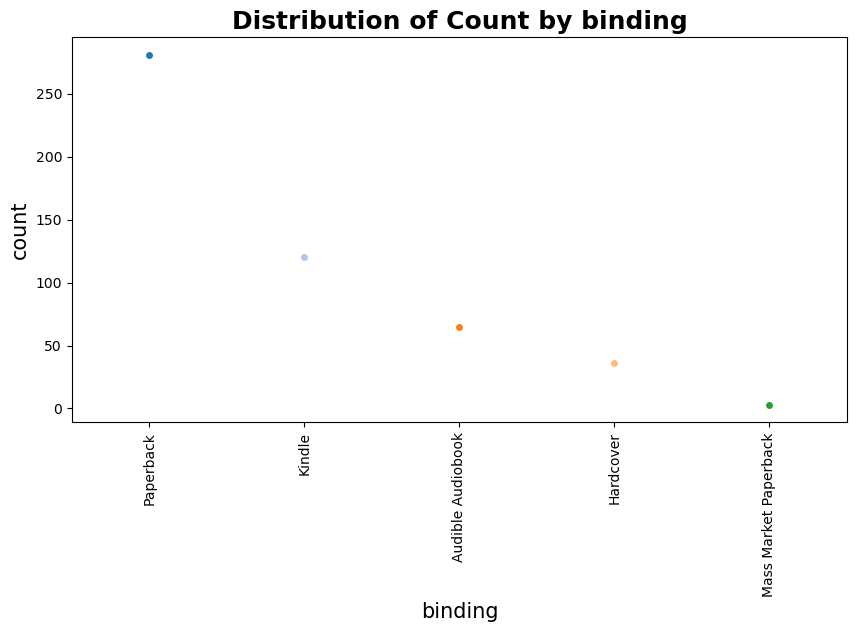

In [43]:
# Visualizing the count of novels per binding format for the entire novels search

fig, ax = plt.subplots(figsize = [10,5])

sns.swarmplot(data = binding_count, x = 'Binding', y = 'Count', palette = 'tab20')

ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set_title('Distribution of Count by binding', fontweight = 'bold', size = 18)
ax.set_xlabel('binding',  size = 15)
ax.set_ylabel('count',  fontsize = 15)

In [44]:
# Getting data for only the bestselling novels

bestsellers = novels_clean.loc[novels_clean['bestseller/editorspick'] == 'TRUE']
bestsellers.head()

,title,author2,binding,rating,customers_rated,price,bestseller/editorspick,url


### Analysis by Author

In [45]:
# Getting the number of books by each author in the entire dataset

novels_clean['author2'].value_counts()

Colleen Hoover                            8
David Lee Corley                          7
Wings of Fire Graphix                     5
Harry Potter                              5
The Ba-Sitters Club Graphix               5
                                         ..
Shain Rose                                1
Jennifer Beals, Benjamin Bratt, et al.    1
River Rain                                1
Primer                                    1
Lehanne R                                 1
Name: author2, Length: 433, dtype: int64

In [46]:
# Getting the top 100 authors with the highest number of reviews(customers_rated)

reviews_by_author = novels_clean[['author2', 'customers_rated']].groupby('author2').sum().sort_values(by='customers_rated', ascending=False)[:100].reset_index()
reviews_by_author

,author2,customers_rated
0,Colleen Hoover,569854
1,Delia Owens,344309
2,Harry Potter,267145
3,A Court of Thorns and Roses,207928
4,"Matt Haig, Carey Mulligan, et al.",199496
...,...,...
95,Maggie Shipstead,11587
96,Nicole Ellis,11392
97,Cat and Mouse Duet,11252
98,"Ruth Ware, Imogen Church, et al.",11233


In [47]:
# Getting the average rating by author

average_rating_by_author = novels_clean[['author2', 'rating']].groupby('author2').mean().sort_values(by='rating', ascending=False).reset_index()
average_rating_by_author

,author2,rating
0,8-Bit Warrior Graphic Novels,5.0
1,"Kayla Miller , Jeffrey Canino, et al.",5.0
2,Vicki M Stewart,5.0
3,David Spell,5.0
4,Everett Heath,5.0
...,...,...
428,Hayley Faye,3.5
429,Jeffrey Brown,3.5
430,Peter Hoey and Maria Hoey,3.0
431,Ismail Kadare and Barbara Bray,2.5


In [48]:
# Getting the authors with atleast one best seller novel

bestsellers_authors = bestsellers['author2'].drop_duplicates()
bestsellers_authors

Series([], Name: author2, dtype: object)

In [49]:
# Getting the top 100 reviews authors who also made it to the bestsellers list

reviews_by_author[reviews_by_author['author2'].isin(bestsellers_authors)][['author2']]

,author2


We notice that only 69 of the top 100 reviews authors made it to the bestsellers list

### Analysis by Novels

In [50]:
# Getting the number of all novels by format

novels_clean[['binding', 'title']].groupby('binding').size()

binding
Audible Audiobook         65
Hardcover                 36
Kindle                   120
Mass Market Paperback      3
Paperback                281
dtype: int64

In [51]:
# Getting the number of bestseller novels by format

bestsellers[['binding', 'title']].groupby('binding').size()

Series([], dtype: int64)

We can see that none of the Mass Market Paperback novels featured amongst the bestsellers.

In [52]:
# Getting the average bestseller rating by book format

bestsellers.pivot_table('rating', index='binding', aggfunc='mean')

""
binding


In [53]:
# Getting the average bestseller number of reviews by book format

bestsellers.pivot_table('customers_rated', index='binding', aggfunc='mean')

""
binding


It can be seen that for the bestseller novels, the trend is thesame for measures of average rating and average number of reviews, with Audible Audiobook scoring the highest and the Paperback format coming in the last position.

In [54]:
# Getting the data for the novel with the highest price

novel_maxprice = novels_clean.loc[novels_clean['price'] == novels_clean['price'].max()]
novel_maxprice

,title,author2,binding,rating,customers_rated,price,bestseller/editorspick,url
214,The George Smiley Novels 8-Volume Boxed Set,John le Carré,Paperback,4.8,115,70.36,non-bestseller,https://www.amazon.com/George-Smiley-Novels-Bo...


In [55]:
# Getting the data for the novel with the lowest price excluding $0 items since most Kindle and Audiobooks are listed at $0 and are based on subscription

novel_minprice = novels_clean.loc[novels_clean['price'] == novels_clean['price'][novels_clean['price'].gt(0)].min(0)]
novel_minprice

,title,author2,binding,rating,customers_rated,price,bestseller/editorspick,url
121,One True Loves: A Novel,Taylor Jenkins Reid,Kindle,4.4,10029,1.99,non-bestseller,https://www.amazon.com/True-Loves-Taylor-Jenki...


<AxesSubplot:>

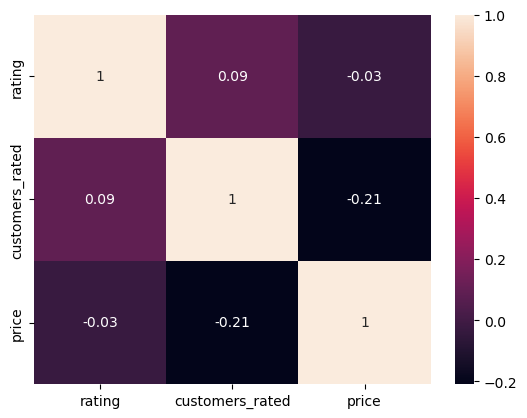

In [56]:
# looking correlations between the features. (This would have been more useful in a regression problem to avoid multicolinearity)

sns.heatmap(novels_clean.corr(),annot=True)
#print(train_num.corr())

## Data preparation for modeling

Here, we want to build a machine learning classifier to predict whether a novel will be a bestseller on amazon.com based on the attibutes, author, binding, rating, customers_rated (reviews) and price.

In [57]:
# Selecting the data to be used

novels = novels_clean[['binding', 'rating', 'customers_rated', 'price', 'bestseller/editorspick']]
novels
                       

,binding,rating,customers_rated,price,bestseller/editorspick
0,Paperback,4.5,49,15.26,non-bestseller
1,Paperback,5.0,1,13.99,non-bestseller
2,Paperback,4.5,75881,14.24,non-bestseller
3,Paperback,4.3,36409,10.03,bestseller
4,Audible Audiobook,4.7,7870,0.00,bestseller
...,...,...,...,...,...
513,Paperback,4.2,5,13.99,non-bestseller
514,Paperback,4.6,3,10.99,non-bestseller
515,Paperback,4.6,87,9.99,non-bestseller
516,Paperback,4.1,31,16.95,non-bestseller


In [58]:
novels.loc[novels['binding']=='Audible Audiobook']

,binding,rating,customers_rated,price,bestseller/editorspick
4,Audible Audiobook,4.7,7870,0.0,bestseller
5,Audible Audiobook,4.2,10634,0.0,bestseller
19,Audible Audiobook,4.6,67265,0.0,bestseller
23,Audible Audiobook,4.5,15014,0.0,bestseller
24,Audible Audiobook,4.6,52677,0.0,non-bestseller
...,...,...,...,...,...
355,Audible Audiobook,4.6,34359,0.0,non-bestseller
358,Audible Audiobook,4.7,8163,0.0,non-bestseller
366,Audible Audiobook,4.6,9150,0.0,non-bestseller
368,Audible Audiobook,4.3,16669,0.0,non-bestseller


In [59]:
novels

,binding,rating,customers_rated,price,bestseller/editorspick
0,Paperback,4.5,49,15.26,non-bestseller
1,Paperback,5.0,1,13.99,non-bestseller
2,Paperback,4.5,75881,14.24,non-bestseller
3,Paperback,4.3,36409,10.03,bestseller
4,Audible Audiobook,4.7,7870,0.00,bestseller
...,...,...,...,...,...
513,Paperback,4.2,5,13.99,non-bestseller
514,Paperback,4.6,3,10.99,non-bestseller
515,Paperback,4.6,87,9.99,non-bestseller
516,Paperback,4.1,31,16.95,non-bestseller


#### One Hot encoding

In [60]:
#One-hot-encoding the categorical values

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

novels_onehot1 = pd.get_dummies(novels['binding'], prefix='format', drop_first=True)
#novels_onehot2 = pd.get_dummies(novels['bestseller/editorspick'], prefix='bestseller', drop_first=True)
#novels['bestseller/editorspick'] = label_encoder.fit_transform(novels['bestseller/editorspick'])
novels_onehot = novels.join(novels_onehot1).drop(['binding'], axis=1)
novels_onehot

,rating,customers_rated,price,bestseller/editorspick,format_Hardcover,format_Kindle,format_Mass Market Paperback,format_Paperback
0,4.5,49,15.26,non-bestseller,0,0,0,1
1,5.0,1,13.99,non-bestseller,0,0,0,1
2,4.5,75881,14.24,non-bestseller,0,0,0,1
3,4.3,36409,10.03,bestseller,0,0,0,1
4,4.7,7870,0.00,bestseller,0,0,0,0
...,...,...,...,...,...,...,...,...
513,4.2,5,13.99,non-bestseller,0,0,0,1
514,4.6,3,10.99,non-bestseller,0,0,0,1
515,4.6,87,9.99,non-bestseller,0,0,0,1
516,4.1,31,16.95,non-bestseller,0,0,0,1


In [61]:
column_names = ['rating', 'customers_rated', 'price', 'format_Hardcover', 'format_Kindle', 'format_Mass Market Paperback', 'format_Paperback', 'bestseller/editorspick']
novels_onehot = novels_onehot.reindex(columns = column_names)
novels_onehot

,rating,customers_rated,price,format_Hardcover,format_Kindle,format_Mass Market Paperback,format_Paperback,bestseller/editorspick
0,4.5,49,15.26,0,0,0,1,non-bestseller
1,5.0,1,13.99,0,0,0,1,non-bestseller
2,4.5,75881,14.24,0,0,0,1,non-bestseller
3,4.3,36409,10.03,0,0,0,1,bestseller
4,4.7,7870,0.00,0,0,0,0,bestseller
...,...,...,...,...,...,...,...,...
513,4.2,5,13.99,0,0,0,1,non-bestseller
514,4.6,3,10.99,0,0,0,1,non-bestseller
515,4.6,87,9.99,0,0,0,1,non-bestseller
516,4.1,31,16.95,0,0,0,1,non-bestseller


In [62]:
novels_onehot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 505 entries, 0 to 517
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   rating                        505 non-null    float64
 1   customers_rated               505 non-null    int32  
 2   price                         505 non-null    float64
 3   format_Hardcover              505 non-null    uint8  
 4   format_Kindle                 505 non-null    uint8  
 5   format_Mass Market Paperback  505 non-null    uint8  
 6   format_Paperback              505 non-null    uint8  
 7   bestseller/editorspick        505 non-null    object 
dtypes: float64(2), int32(1), object(1), uint8(4)
memory usage: 35.9+ KB


In [63]:
# Splitting the data into features, X and the response, y

X = novels_onehot.iloc[:, :-1]
y = novels_onehot.iloc[:, -1]
y

0      non-bestseller
1      non-bestseller
2      non-bestseller
3          bestseller
4          bestseller
            ...      
513    non-bestseller
514    non-bestseller
515    non-bestseller
516    non-bestseller
517    non-bestseller
Name: bestseller/editorspick, Length: 505, dtype: object

In [64]:
# Splitting the data into the train sets and the test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [65]:
X_test

,rating,customers_rated,price,format_Hardcover,format_Kindle,format_Mass Market Paperback,format_Paperback
90,3.9,1813,14.00,0,0,0,1
97,4.3,37860,0.00,0,1,0,0
489,5.0,10,14.97,0,0,0,1
349,4.5,5715,0.00,0,1,0,0
405,4.3,26,24.29,1,0,0,0
...,...,...,...,...,...,...,...
285,4.8,127,9.99,0,0,0,1
92,4.6,123,15.99,0,0,0,1
18,4.5,1171,14.99,0,1,0,0
275,4.4,21721,16.19,0,0,0,1


## Selecting and training a model

In [66]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

#### Decision Tree Classifier

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(X_train, y_train)

predicted_values = DecisionTree.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)


DecisionTrees's Accuracy is:  73.76237623762376


In [68]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, X, y, cv=5).mean()
score

0.7346534653465346

#### Random Forest Classifier

In [69]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=20, random_state=0)
rfc.fit(X_train,y_train)

predicted_values = rfc.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('rfc')
print("rfc's Accuracy is: ", x)


rfc's Accuracy is:  0.7623762376237624


In [70]:
# Cross validation score (Random Forest)
score = cross_val_score(rfc,X, y, cv=5).mean()
score

0.7504950495049505

#### XGBoost Classifier

In [71]:
import xgboost as xgb
xb = xgb.XGBClassifier()

y_train_encoded = label_encoder.fit_transform(y_train) #encoding the y values since model can only accept 0 & 1
y_test_encoded = label_encoder.fit_transform(y_test)
y_encoded = label_encoder.fit_transform(y)

xb.fit(X_train, y_train_encoded)

predicted_values = xb.predict(X_test)

x = metrics.accuracy_score(y_test_encoded, predicted_values)
acc.append(x)
model.append('xb')
print("XGBoost's Accuracy is: ", x)


[04:25:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost's Accuracy is:  0.7623762376237624


In [72]:
# Cross validation score (XGBoost)
score = cross_val_score(xb, X, y_encoded, cv=5).mean()
score

[04:25:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:25:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:25:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:25:17] WARNING:

0.7366336633663366

#### Supprt Vector Machine

The customers_rated column has a relativley wide range of values from 0 to thousands. Variables with bigger magnitude will dominate over those with smaller magnitude. Thus feature scaling is needed here to bring the column to relative values comparable to the other numeric columns, since some ML algorithms are sensitive to the relative scales of features.

In [73]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit transform scaler on training data
norm = MinMaxScaler()#.fit(X_train)
X_train_norm = norm.fit_transform(X_train)

# transform testing data
X_test_norm = norm.transform(X_test)

svm = SVC(kernel='poly', degree=3, C=1)
svm.fit(X_train_norm, y_train)

predicted_values = svm.predict(X_test_norm)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('svm')
print("svm's Accuracy is: ", x)

# If svm is chosen, there will be no need to reverse normalization on the predictions since the y data was not scaled


svm's Accuracy is:  0.7277227722772277


In [74]:
# Cross validation score (XGBoost)
score = cross_val_score(svm, X, y, cv=5).mean()
score

0.7485148514851485

In [75]:
X_test_norm

array([[5.92592593e-01, 5.26272988e-03, 1.98976691e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [7.40740741e-01, 1.09956783e-01, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.61393868e-05, 2.12762933e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [8.14814815e-01, 3.39812029e-03, 2.13047186e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.77777778e-01, 6.30830535e-02, 2.30102331e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [9.25925926e-01, 1.23726431e-03, 8.51335986e-02, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

### Model accuracy comparison

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

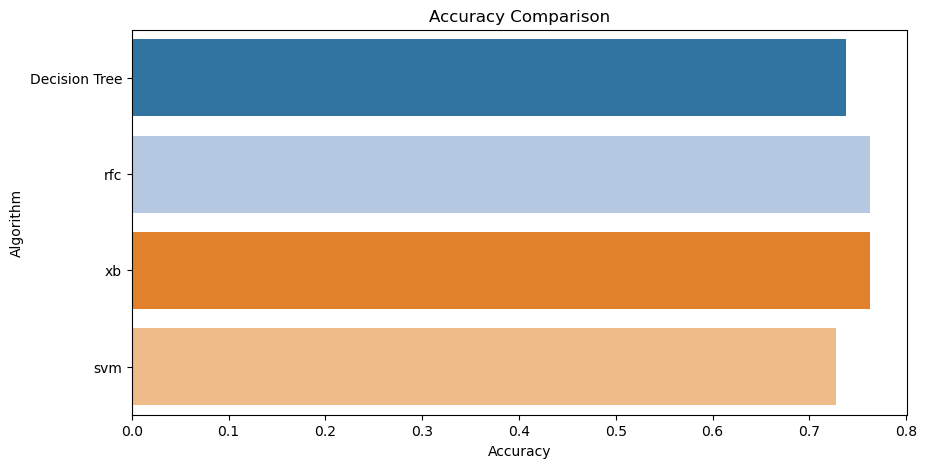

In [76]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc, y = model, palette='tab20')

From the accuracy figures we see that the best model is the Random forest Classifier with an accuracy of 75%.

### Predicting the bestseller novels from the test data

In [77]:
y_pred = rfc.predict(X_test)
y_pred

array(['non-bestseller', 'non-bestseller', 'non-bestseller',
       'non-bestseller', 'non-bestseller', 'non-bestseller',
       'non-bestseller', 'non-bestseller', 'non-bestseller',
       'non-bestseller', 'non-bestseller', 'bestseller', 'non-bestseller',
       'non-bestseller', 'bestseller', 'non-bestseller', 'non-bestseller',
       'bestseller', 'bestseller', 'bestseller', 'non-bestseller',
       'non-bestseller', 'non-bestseller', 'bestseller', 'bestseller',
       'non-bestseller', 'non-bestseller', 'non-bestseller', 'bestseller',
       'non-bestseller', 'non-bestseller', 'non-bestseller',
       'non-bestseller', 'non-bestseller', 'non-bestseller',
       'non-bestseller', 'non-bestseller', 'non-bestseller',
       'non-bestseller', 'non-bestseller', 'bestseller', 'non-bestseller',
       'non-bestseller', 'non-bestseller', 'non-bestseller',
       'non-bestseller', 'non-bestseller', 'non-bestseller',
       'non-bestseller', 'non-bestseller', 'non-bestseller', 'bestseller',

# Model Deployment

We want to be able to interact with this model on a web page

### Export model to pickle file

In [78]:
import joblib

#saving the trained model to a pickle file
joblib.dump(rfc, 'finalModel.pkl', compress = 1)

['finalModel.pkl']

In [79]:
# Create Data Frame
data = pd.DataFrame({'format_Hardcover': [0], 'format_Kindle': [1], 'format_Mass Market Paperback': [0],
                     'format_Paperback': [0], 'rating': [4.5], 'customers_rated': [10000], 'price': [0]})

#normalize the data (if svm)
#data_norm = norm.transform(data)

# open file
file = open("finalModel.pkl", "rb")

# load trained model
trained_model = joblib.load(file)

# predict
prediction = trained_model.predict(data)
prediction

print("The model prediction states that the novel will be a", prediction)

The model prediction states that the novel will be a ['bestseller']
